In [1]:
from mp1 import *
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import  Dense , Activation , Conv2D, MaxPooling2D, Dropout, Flatten, Reshape, UpSampling2D, ZeroPadding2D, Input
from keras.optimizers import SGD, Adam
from keras.utils import np_utils


Using TensorFlow backend.


## I- Simple Classification

In [2]:
[X_train, Y_train] = generate_dataset_classification(300,20)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:


In [3]:
model = Sequential()

model.add(Dense(3, input_shape = (5184,)))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 0s 563us/step - loss: 2.0857 - acc: 0.4133
Epoch 2/10
300/300 [==============================] - 0s 124us/step - loss: 0.9144 - acc: 0.6600
Epoch 3/10
300/300 [==============================] - 0s 158us/step - loss: 0.5357 - acc: 0.7667
Epoch 4/10
300/300 [==============================] - 0s 140us/step - loss: 0.4399 - acc: 0.8567
Epoch 5/10
300/300 [==============================] - 0s 153us/step - loss: 0.3517 - acc: 0.9200
Epoch 6/10
300/300 [==============================] - 0s 125us/step - loss: 0.2942 - acc: 0.9733
Epoch 7/10
300/300 [==============================] - 0s 135us/step - loss: 0.2744 - acc: 0.9433
Epoch 8/10
300/300 [==============================] - 0s 135us/step - loss: 0.2646 - acc: 0.9200
Epoch 9/10
300/300 [==============================] - 0s 128us/step - loss: 0.3583 - acc: 0.8233
Epoch 10/10
300/300 [==============================] - 0s 120us/step - loss: 0.2083 - acc: 0.9467


In [5]:
[X_test, Y_test] = generate_dataset_classification(200,20)
Y_test = np_utils.to_categorical(Y_test, 3)
model.evaluate(X_test, Y_test)

Creating data:
200/200 [==============================] - 0s 147us/step


[0.1889590847492218, 1.0]

In [6]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

## II- Visulization of the Solution

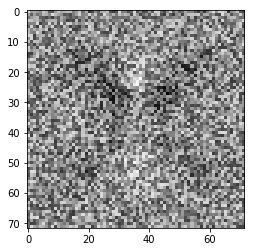

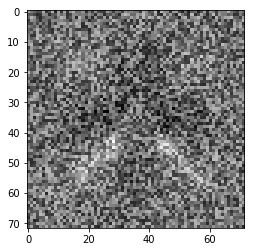

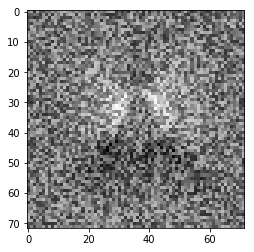

In [7]:
## Visualisation of the Solution

classifier = model.get_weights()[0]
cl1 = classifier[:,0]
cl2 =  classifier[:,1]
cl3 = classifier[:,2]

size = int(np.sqrt(cl1.shape[0]))

cl1 = cl1.reshape((size, size))
cl2 = cl2.reshape((size, size))
cl3 = cl3.reshape((size, size))

plt.figure(1)
plt.imshow(cl1, cmap='gray')
plt.figure(2)
plt.imshow(cl2, cmap='gray')
plt.figure(3)
plt.imshow(cl3, cmap='gray')

## III- A More Difficult Classification Problem 

In [8]:
[X_train, Y_train] = generate_dataset_classification(500, 20, True)
Y_train =  np_utils.to_categorical(Y_train, 3)

Creating data:


In [9]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 0s 273us/step - loss: 2.6518 - acc: 0.3680
Epoch 2/10
500/500 [==============================] - 0s 81us/step - loss: 1.7145 - acc: 0.4120
Epoch 3/10
500/500 [==============================] - 0s 100us/step - loss: 1.3035 - acc: 0.4300
Epoch 4/10
500/500 [==============================] - 0s 83us/step - loss: 1.0230 - acc: 0.5140
Epoch 5/10
500/500 [==============================] - 0s 91us/step - loss: 0.9446 - acc: 0.5540
Epoch 6/10
500/500 [==============================] - 0s 83us/step - loss: 1.0220 - acc: 0.5160
Epoch 7/10
500/500 [==============================] - 0s 90us/step - loss: 0.8581 - acc: 0.5780
Epoch 8/10
500/500 [==============================] - 0s 75us/step - loss: 0.8681 - acc: 0.5880
Epoch 9/10
500/500 [==============================] - 0s 91us/step - loss: 0.8786 - acc: 0.5700
Epoch 10/10
500/500 [==============================] - 0s 80us/step - loss: 0.9265 - acc: 0.5780


In [10]:
[X_test, Y_test] = generate_test_set_classification()
model.evaluate(X_test, Y_test)

Creating data:
300/300 [==============================] - 0s 107us/step


[1.294668976465861, 0.57]

In [11]:
[X_train, Y_train] = generate_dataset_classification(500, 20, True)
Y_train =  np_utils.to_categorical(Y_train, 3)

size = int(np.sqrt(X_train.shape[1]))

X_train = X_train.reshape((X_train.shape[0], size,size,1))
print(X_train.shape)

Creating data:
(500, 72, 72, 1)


In [12]:
model2 = Sequential()
model2.add(Conv2D(16, (5,5) , input_shape =(size,size,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train,Y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 1.1995 - acc: 0.4380
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.8735 - acc: 0.6740
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.7273 - acc: 0.7360
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6343 - acc: 0.7720
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5848 - acc: 0.7940
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5268 - acc: 0.8120
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4841 - acc: 0.8460
Epoch 8/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4518 - acc: 0.8480
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4190 - acc: 0.8620
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3773 - acc: 0.8860
Epoch 11/20
500/500 [============================

In [14]:
[X_test, Y_test] = generate_test_set_classification()

size = int(np.sqrt(X_test.shape[1]))

X_test = X_test.reshape((X_test.shape[0], size,size,1))
model2.evaluate(X_test, Y_test)

Creating data:
300/300 [==============================] - 0s 1ms/step


[0.47409948507944744, 0.8299999992052715]

## IV- A regression Problem

In [2]:
def process_data(y):
    y_pre = np.zeros(y.shape)
    for i in range(len(y)):
        index = np.argsort(y[i,::2])
        y_pre[i,::2] = y[i,2*index]
        y_pre[i,1::2] = y[i,2*index+1]
    return y_pre
        
        

In [25]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)
[X_val, Y_val] = generate_dataset_regression(50,20)
[X_test, Y_test] = generate_test_set_regression()

size = int(np.sqrt(X_train.shape[1])) 

X_train = X_train.reshape((X_train.shape[0], size,size,1))
X_val = X_val.reshape((X_val.shape[0], size, size, 1))
X_test = X_test.reshape((X_test.shape[0], size, size,1))

Y_train = process_data(Y_train)
Y_val = process_data(Y_val)

meaned = np.mean(Y_train, axis = 0)
variance = np.std(Y_train, axis=0)

Y_train = (Y_train-meaned)/variance
Y_val = (Y_val-meaned)/variance
Y_test = (Y_test - meaned)/variance


Creating data:
Creating data:
Creating data:


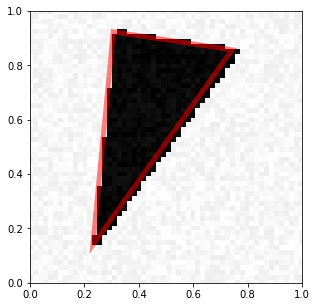

[-0.0775066  -1.23758974 -0.85466024  1.4840191  -0.05227395  1.25684469]


In [26]:
visualize_prediction(X_train[0], variance*Y_train[0]+meaned)
print(Y_train[0])

In [29]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=(size,size,1), activation='relu', strides=1))
model3.add(Conv2D(16, (3,3), activation='relu', strides=1))
model3.add(Conv2D(16, (3,3), activation='relu', strides=2))

model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))

model3.add(Dense(6))

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 70, 70, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 68, 68, 16)        4624      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 33, 33, 16)        2320      
_________________________________________________________________
flatten_10 (Flatten)         (None, 17424)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               1742500   
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_48 (Dense)             (None, 100)               10100     
__________

In [30]:
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val,Y_val))

Train on 3000 samples, validate on 50 samples
Epoch 1/50
3000/3000 [==============================] - 37s 12ms/step - loss: 0.6112 - val_loss: 0.3770
Epoch 2/50
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2865 - val_loss: 0.3125
Epoch 3/50
3000/3000 [==============================] - 30s 10ms/step - loss: 0.2045 - val_loss: 0.2656
Epoch 4/50
3000/3000 [==============================] - 30s 10ms/step - loss: 0.1468 - val_loss: 0.2171
Epoch 5/50
3000/3000 [==============================] - 30s 10ms/step - loss: 0.1043 - val_loss: 0.1856
Epoch 6/50
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0729 - val_loss: 0.1692
Epoch 7/50
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0532 - val_loss: 0.1577
Epoch 8/50
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0420 - val_loss: 0.1425
Epoch 9/50
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0301 - val_loss: 0.1474
Epoch 10/50
3000/300

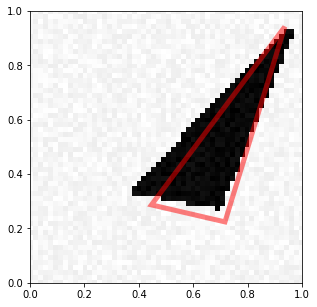

0 [ 3.663831    1.51569791  0.80465012 -0.76436498 -2.03750885 -0.56970756] [ 1.0575798 -0.7301789  0.9856919 -0.9428466  0.9616942  1.5527236]


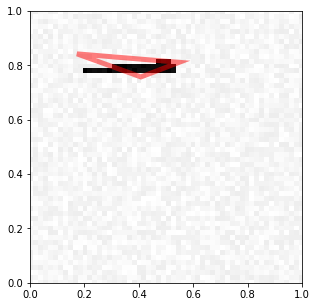

1 [ 1.30490245  1.08765579 -1.42687863  0.97549799 -1.25501454  1.01871329] [-0.3852018   1.1850895  -0.39850333  0.9080566  -1.0700318   1.0974269 ]


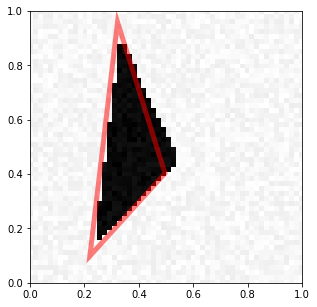

2 [-0.06592197 -1.18713535  0.0806858  -0.14793732 -2.25488237  1.31566775] [-0.13567513 -1.3789277  -0.78431106  1.6076971  -1.3424149  -0.32289243]


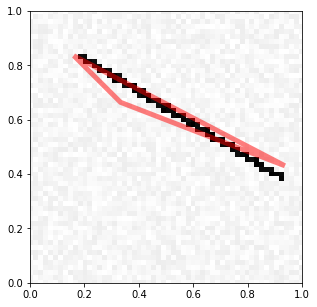

3 [-0.44055318  1.18627117  0.35765617  0.31588134  0.82754393 -0.41340701] [-0.44526678  1.1608766  -0.73473966  0.5839357   0.96279556 -0.22717285]


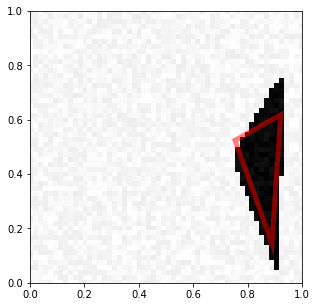

4 [ 3.38698944 -1.53050461  1.06831689 -0.13789715  0.78575589  0.87364429] [ 2.6780913   0.0881773   1.7601626  -1.2186581   0.8822222   0.42422068]


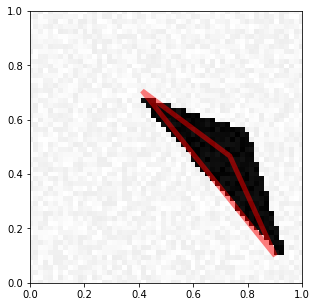

5 [ 2.79501815  0.16184843 -0.44838061  0.6425772   0.80461048 -1.39579583] [ 0.8782985   0.7160902   1.0652064  -0.10143713  0.7782175  -1.3800335 ]


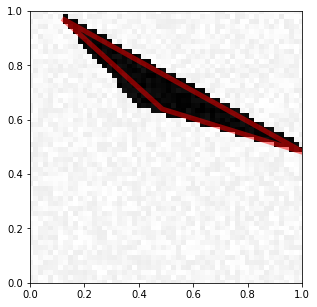

6 [ 0.75434021  0.54150894 -1.73310253  1.68816505  1.2385578  -0.04250801] [-0.6682079   1.6323763  -0.04597783  0.49732172  1.3434931  -0.06116888]


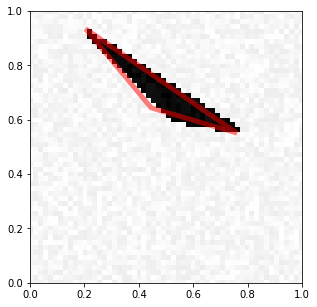

7 [ 2.64292712  0.2097445   0.11257213  0.34589824 -2.86701152  1.47649555] [-0.21796988  1.5016495  -0.22987169  0.51323473  0.0394355   0.19177121]


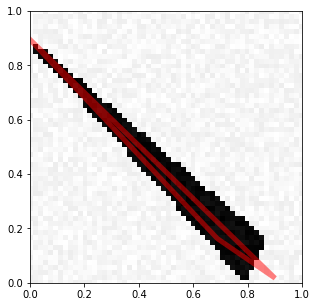

8 [ 2.76948391 -1.69393141  1.5379108  -1.21299255 -3.8910972   1.31103839] [-1.3463999   1.3998029   0.86107415 -1.1565663   0.77433014 -1.6667597 ]


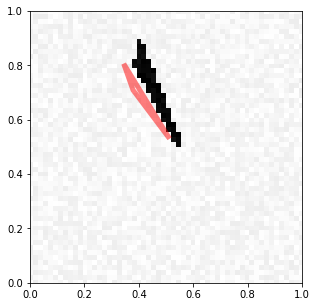

9 [ 0.67736669  1.06008379  0.18165342 -0.00194318 -1.93087925  1.41736091] [ 0.5207515   1.05887    -0.5293078   0.74034995 -1.2548478   0.12024799]


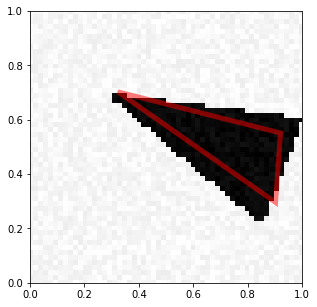

10 [ 0.2710608   0.64030015  2.11988712  0.3558515   0.41577025 -0.94345897] [ 0.40784317  0.7029514   1.8197271  -0.69486177  0.88003355  0.19235075]


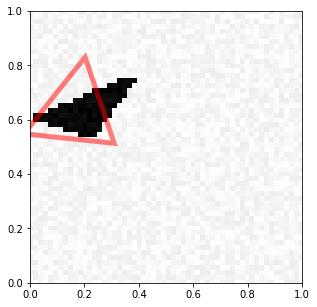

11 [ 0.60626885  0.88523065 -2.21049022  0.37150642 -2.79169067  0.14863685] [-1.4114517   0.17084678 -1.3191965   1.1606156  -2.3193088   0.06040189]


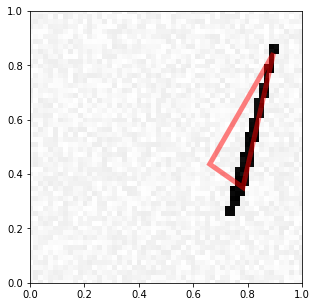

12 [ 2.43764386 -0.88138252  1.71657998  1.30860941  0.07027113 -0.558015  ] [ 2.1864004 -0.212938   1.2814353 -0.5028702  0.7437264  1.2109724]


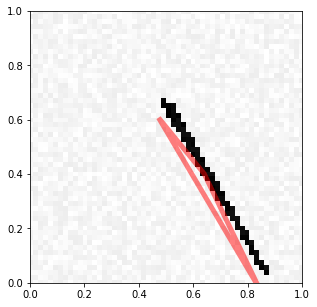

13 [ 1.17665123  0.58374956  1.59772213 -1.65316511 -1.32481021  0.54495541] [ 1.1964332   0.37385663  0.642553   -0.3276197   0.46313864 -1.7854838 ]


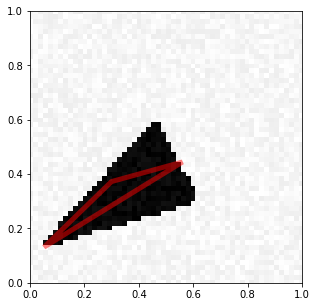

14 [-1.06288248 -1.26898201 -0.23536415  0.30957821 -0.85144586 -0.67463165] [-1.0243233  -1.2659426  -0.8834339  -0.4281341  -1.0062383  -0.17888045]


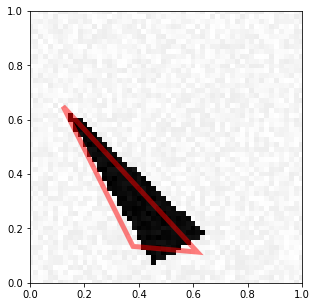

15 [ 1.04485189 -1.47161679 -1.61106416  0.40157626 -0.74964861 -1.12385714] [-0.6544989   0.51860154 -0.53012586 -1.255622   -0.718604   -1.3322408 ]


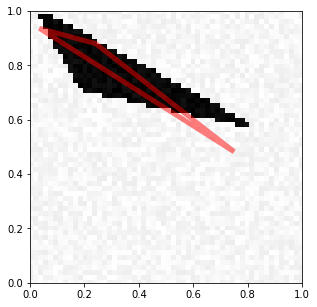

16 [-1.15659618  1.72020193 -1.44573657  0.77791479  0.14804504  0.29220259] [-1.1148618   1.5089998  -1.1425554   1.3319651  -0.01301021 -0.04737126]


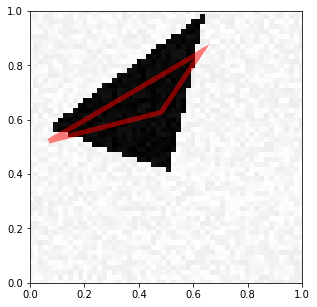

17 [ 1.92829184  1.64271744 -0.03622816 -0.25503547 -3.55087073  0.2669709 ] [-0.9285617   0.07937554 -0.06536001  0.45702258 -0.6378282   1.2358869 ]


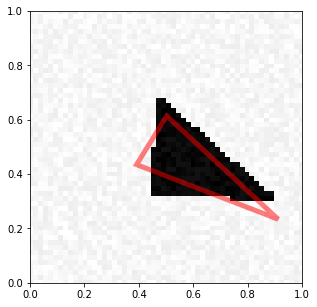

18 [ 1.04503604 -0.57965165 -0.19640166  0.62842259  0.61852663 -0.67083433] [ 0.7683229  -0.21910642  0.02570182  0.40936247  0.83489174 -0.9120497 ]


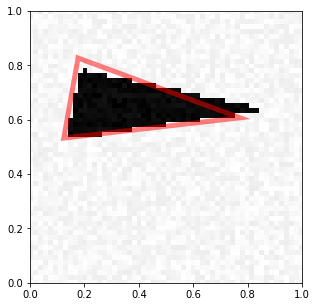

19 [-0.34133417  0.94769474  1.38883984  0.48823386 -3.26919716  0.1406466 ] [-0.6411605   0.11758532 -1.4356056   1.1495826   0.09975934  0.38753492]


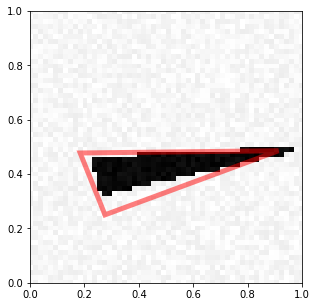

20 [ 0.04223849 -0.59485163  2.00993143 -0.02644963 -2.77949776 -0.15271812] [-0.3237297  -0.07209492 -0.99185914 -0.85305566  0.83965933 -0.03493562]


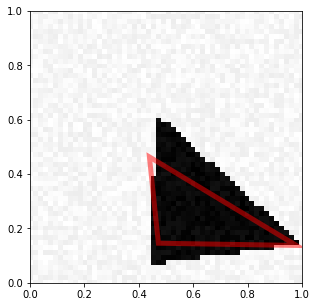

21 [ 0.97551186 -1.48496695 -0.16891907  0.33709324  1.05219758 -1.23500749] [ 1.1922531  -1.2165979  -0.25932205 -0.11353104  1.1843319  -1.2473922 ]


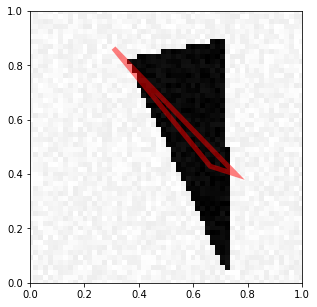

22 [ 2.35549875  1.35909416 -0.64195989  1.13252255 -0.24579123 -1.56084375] [ 0.32397282  1.257109    0.7433916  -0.2325642   0.02509641 -0.3384511 ]


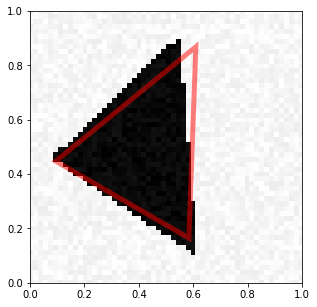

23 [-0.84402694 -0.14293064  0.12600708  1.36007741 -0.86563926 -1.34724463] [-0.7965182  -0.17560853  0.5063319   1.2930068  -0.8839982  -1.1532075 ]


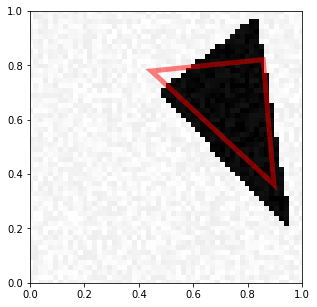

24 [ 3.59194828 -1.00182909 -0.10105572  0.71466775  0.30154809  1.65134279] [ 1.0552926   0.9678262   1.6160756   1.1291149   0.7534941  -0.46779776]


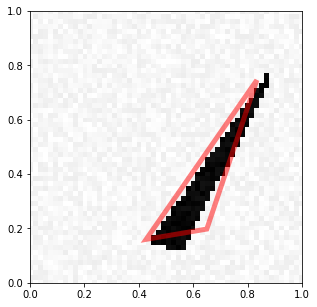

25 [ 0.99100809 -1.25848375  1.62159467  0.90228166 -1.11968983 -1.29504019] [ 0.9545877  -1.1673167   0.6861266  -1.0344313   0.42414436  0.8691677 ]


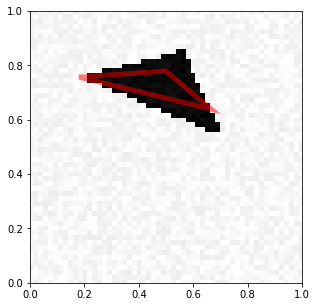

26 [ 2.23235586  0.20621499 -1.28609725  0.90419087 -1.11899696  1.2231731 ] [-0.34291983  0.8895396   0.01020605  0.983141   -0.450985    0.49691647]


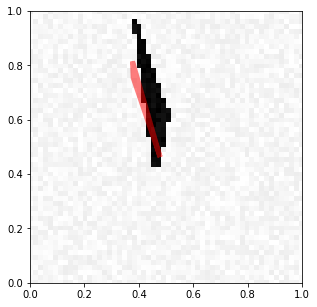

27 [ 0.65507324  1.64438575 -0.23087359 -0.25732231 -1.37732126  0.40100089] [ 0.70352805  0.8813593  -0.53776604  1.1059737  -1.4365357  -0.11450616]


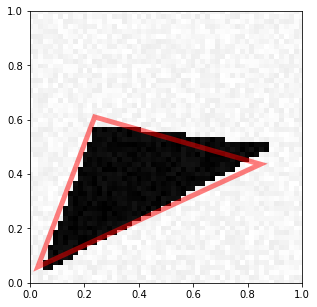

28 [ 3.20082321 -0.00608836 -1.16776584  0.25624471 -3.71123678 -1.57329143] [-1.1446027  -1.5164757  -1.1615753   0.3966932   0.49567884 -0.20739377]


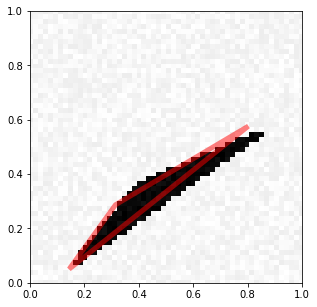

29 [ 3.085928    0.17948971 -1.53082872 -1.50215312 -1.96222417 -0.50642827] [-0.53696376 -1.5442415  -0.8174046  -0.7243155   0.2603461   0.27983925]


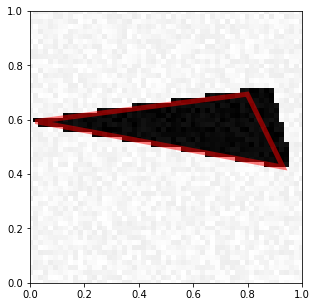

30 [ 3.24588739  0.74440867  1.94592752 -0.23586361 -3.90105959  0.3293825 ] [-1.1911577   0.32696015  1.3544792   0.687266    0.92745006 -0.24464202]


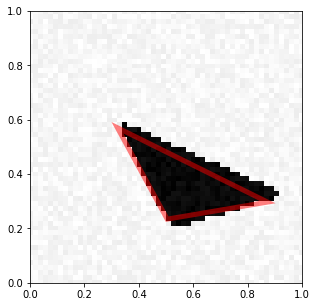

31 [ 1.39507842 -1.01052435 -0.77816915  0.27819571  0.73434644 -0.60984032] [ 0.39887124  0.24783516  0.03366873 -0.9079735   0.63016605 -0.69213253]


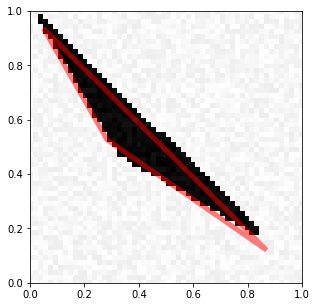

32 [-1.16321563  1.67397431 -0.8105865  -0.06733714  0.36412809 -1.126793  ] [-1.0348529   1.5082662  -0.9573549   0.10593295  0.61232793 -1.3066403 ]


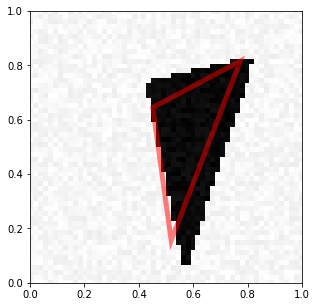

33 [ 2.89380664  1.13556348 -0.33636129  0.81782442 -1.04099853 -1.52410685] [ 1.083065    0.5042228   0.09974188 -1.1800004   0.10563171  1.1133851 ]


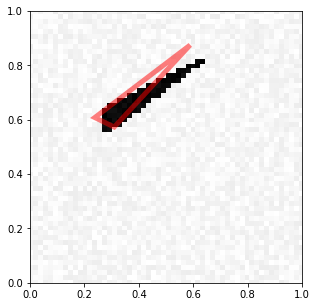

34 [ 1.95342104  1.11927121 -1.06964963  0.46847039 -2.56131157  0.19846742] [-0.04067262  0.3775038  -0.8394512   0.2683356  -0.8592595   1.3182743 ]


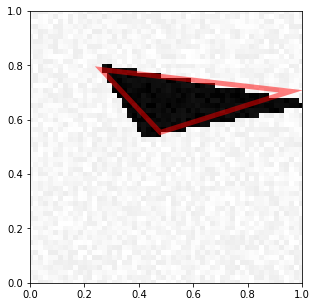

35 [ 0.85191309  0.14620748  2.14406253  0.56426734 -2.59410285  1.03787242] [ 0.08629189  0.9857918  -0.08111697  0.19933863  1.0800246   0.7258491 ]


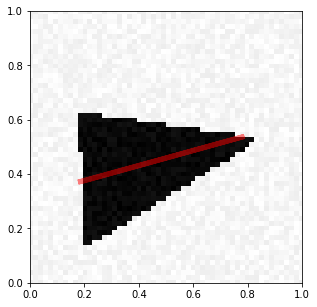

36 [ 2.92133233  0.0809642  -1.44184336  0.42546618 -2.94907841 -1.26969722] [-0.22836511 -0.42239344 -1.4342601  -0.43500584  0.18527901  0.1492472 ]


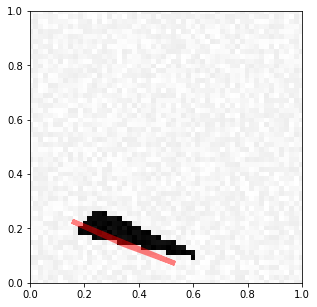

37 [-0.4320062  -1.09655895 -1.14414687 -0.84648583 -0.85562142 -1.41737731] [-0.47935283 -0.93724835 -0.69140965 -1.229128   -1.1497769  -1.4782078 ]


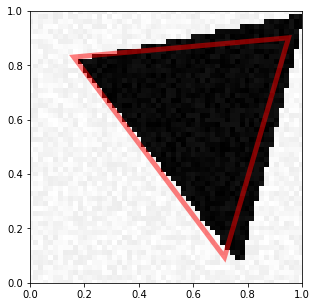

38 [ 3.84999992  1.67038955  1.14188438 -1.4622766  -3.02191066  1.11597055] [-0.44744432  1.1451342   0.9779627  -1.3931893   1.0332546   1.4109854 ]


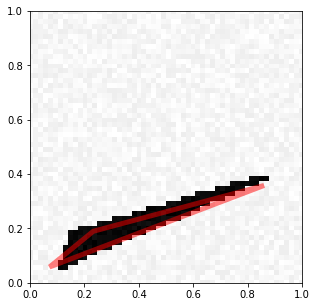

39 [-0.55841695 -1.11450336 -1.75104334 -1.53587374  0.50237166 -0.3874697 ] [-0.9162376  -1.5178186  -1.1854128  -1.0632349   0.56290543 -0.47944406]


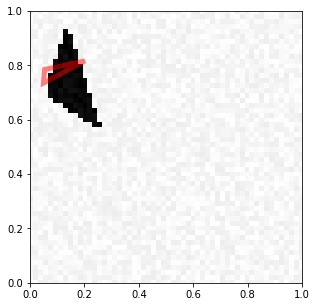

40 [-0.9983925   0.70945826 -1.67740881  1.49004235 -2.70421136  0.27072793] [-1.0354842  0.8141459 -1.9858161  1.0028945 -2.8845365  1.1151161]


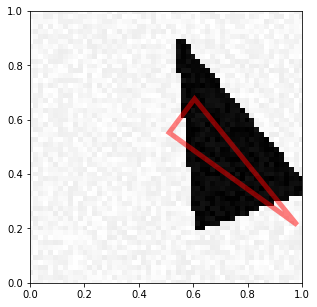

41 [ 1.47336598  1.39514985  0.45411227 -1.05184699  1.28834791 -0.54266061] [ 1.3994043   0.1862468   0.4853394   0.6276501   1.1990387  -0.98343515]


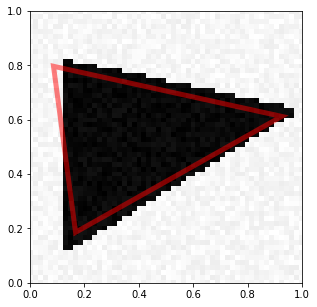

42 [-0.71068913  1.0986319  -1.68967482 -1.32526478  1.02294575  0.48033235] [-0.8403221   1.0276988  -1.4764265  -1.0760038   0.9031376   0.40478382]


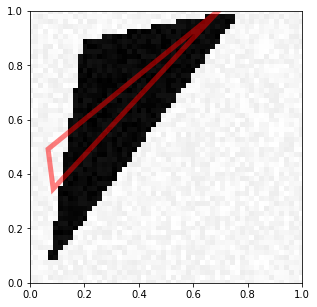

43 [ 2.57696298  1.71841579 -1.39134248  1.35986527 -3.5745225  -1.42801149] [-0.8468391  -0.5266053  -1.9293011  -0.01369739 -0.28270662  1.7772936 ]


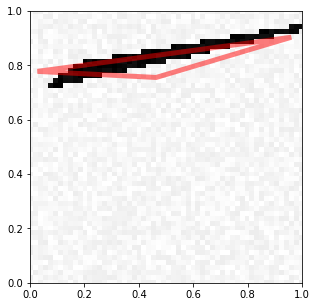

44 [-0.35023201  1.06426627  2.24572675  1.57481221 -3.61253905  0.80803983] [-1.1510948   0.9630834  -0.14923275  0.90120924  1.0866877   1.4183162 ]


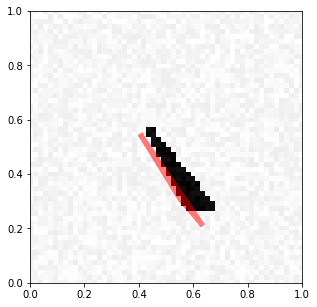

45 [ 1.67712017 -0.79602335 -0.35850343  0.25147821 -0.47280055 -0.80526236] [ 0.8365987   0.16889675  0.24059778 -0.647052   -0.6146908  -0.99463326]


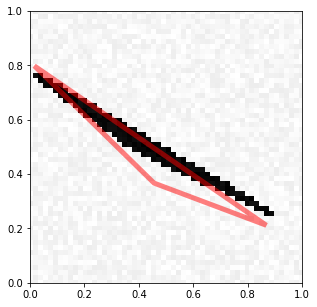

46 [-1.24480427  0.93386757  1.65950812 -0.8580007  -2.11340306  0.03494875] [-1.211779    1.0327494  -0.18241155 -0.44772968  0.6067388  -0.9891214 ]


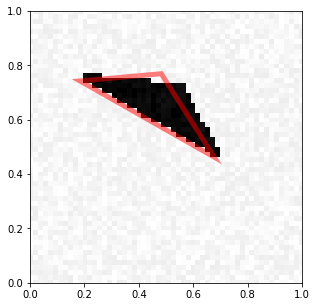

47 [ 1.52078936  0.78132914  0.78724729 -0.08705908 -2.96760684  0.91900832] [-0.32481825  0.84098047 -0.0642949   0.9493081  -0.39334053 -0.11766931]


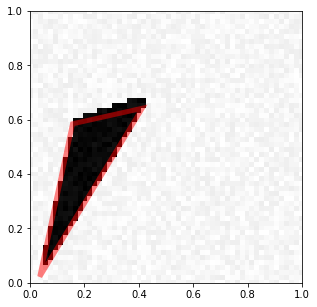

48 [-0.46609803  0.32682541 -0.41282134  0.63468865 -3.72649165 -1.52398831] [-1.1065457  -1.6402075  -1.5259327   0.30927303 -1.7794497   0.50889903]


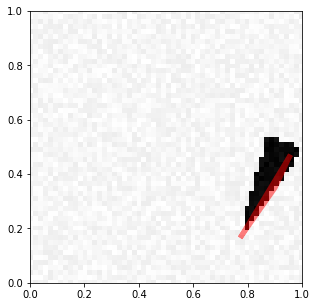

49 [ 3.24818377  0.09468898  2.08725608 -0.03911397  0.09953789 -1.02198169] [ 2.7772002  -1.1475172   1.8126495  -0.5060555   1.0709496  -0.08664447]


In [45]:
Y_get = model3.predict(X_test)
for i in range(50):
    visualize_prediction(X_test[i], variance*Y_get[i]+meaned)
    print(i, Y_test[i], Y_get[i])

In [32]:
model3.evaluate(X_test,variance*Y_test+meaned)

300/300 [==============================] - 1s 3ms/step


1.0676588265101115

## Image Denoising

In [35]:


def generate_a_triangle_noise(noise=0.0):
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata, imdata_noised = generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, noise)
    imdata = (imdata + noise) / (255 + 2 * noise)
    imdata_noised = (imdata_noised + noise)/(255+2*noise)
    return imdata, imdata_noised

def generate_noise(nb,noise=20.0):
    list_data, list_noised = [], []
    for i in range(nb):
        Y,X = generate_a_triangle_noise(noise)
        list_data.append(Y)
        list_noised.append(X)
    return np.array(list_noised), np.array(list_data)

In [101]:
X_train, Y_train = generate_noise(100,20)
X_val, Y_val = generate_noise(50,20)
X_test, Y_test = generate_noise(50,20)

size = int(np.sqrt(X_train.shape[1])) 

X_train = X_train.reshape((X_train.shape[0], size,size,1))
Y_train = Y_train.reshape((Y_train.shape[0], size,size,1))

X_val = X_val.reshape((X_val.shape[0], size,size,1))
Y_val = Y_val.reshape((Y_val.shape[0], size,size,1))

X_test = X_test.reshape((X_test.shape[0], size,size,1))
Y_test = Y_test.reshape((Y_test.shape[0], size,size,1))


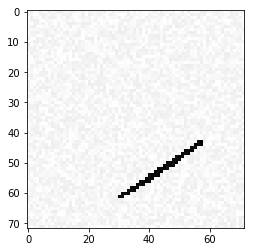

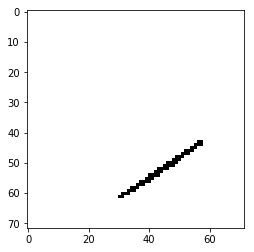

In [83]:
plt.figure()
plt.imshow(X_train[1].reshape((size, size)), cmap='gray')
plt.figure()
plt.imshow(Y_train[1].reshape((size, size)), cmap='gray')

In [84]:
nb_classes = 1
inputs = Input(shape = (size, size, 1))

In [85]:
conv1a = Conv2D(64, 3, activation = 'relu', padding='same')(inputs)
conv1b = Conv2D(64, 3, activation = 'relu', padding='same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)

conv2a = Conv2D(128, 3, activation = 'relu', padding='same')(pool1)
conv2b = Conv2D(128, 3, activation = 'relu', padding='same')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)

conv3a = Conv2D(256, 3, activation = 'relu', padding='same')(pool2)
conv3b = Conv2D(256, 3, activation = 'relu', padding='same')(conv3a)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3b)

up8 = UpSampling2D(size = (2,2))(pool3)
up_conv8 = Conv2D(128, 2, activation = 'relu', padding='same')(up8)
conv8b = Conv2D(128, 3, activation = 'relu', padding='same')(up_conv8)
conv8c = Conv2D(128, 3, activation = 'relu', padding='same')(conv8b)

up9 = UpSampling2D(size = (2,2))(conv8c)
up_conv9 = Conv2D(64, 2, activation = 'relu', padding='same')(up9)
conv9b = Conv2D(64, 3, activation = 'relu', padding='same')(up_conv9)
conv9c = Conv2D(64, 3, activation = 'relu', padding='same')(conv9b)

up10 = UpSampling2D(size = (2,2))(conv9c)
up_conv10 = Conv2D(32, 2, activation = 'relu', padding='same')(up10)
conv10b = Conv2D(32, 3, activation = 'relu', padding='same')(up_conv10)
conv10c = Conv2D(32, 3, activation = 'relu', padding='same')(conv10b)
final = Conv2D(nb_classes, 1)(conv10c)

In [86]:
denoising = Model(input = inputs, output = final)
print(denoising.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 72, 72, 64)        640       
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 36, 36, 128)       73856     
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 128)       0         
__________

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [87]:
denoising.compile(optimizer = 'adam', loss = 'mean_absolute_error')
denoising.fit(X_train, Y_train,  epochs=20, batch_size=1, verbose=1, validation_data = (X_val, Y_val))

Train on 100 samples, validate on 50 samples
Epoch 1/20
100/100 [==============================] - 19s 188ms/step - loss: 0.2477 - val_loss: 0.1320
Epoch 2/20
100/100 [==============================] - 17s 167ms/step - loss: 0.0764 - val_loss: 0.0427
Epoch 3/20
100/100 [==============================] - 17s 167ms/step - loss: 0.0399 - val_loss: 0.0232
Epoch 4/20
100/100 [==============================] - 17s 169ms/step - loss: 0.0368 - val_loss: 0.0358
Epoch 5/20
100/100 [==============================] - 17s 168ms/step - loss: 0.0366 - val_loss: 0.0195
Epoch 6/20
100/100 [==============================] - 17s 168ms/step - loss: 0.0194 - val_loss: 0.0180
Epoch 7/20
100/100 [==============================] - 17s 168ms/step - loss: 0.0211 - val_loss: 0.0181
Epoch 8/20
100/100 [==============================] - 17s 170ms/step - loss: 0.0226 - val_loss: 0.0225
Epoch 9/20
100/100 [==============================] - 17s 168ms/step - loss: 0.0194 - val_loss: 0.0129
Epoch 10/20
100/100 [=======

In [102]:
Y_get0 = denoxising.predict(X_test)

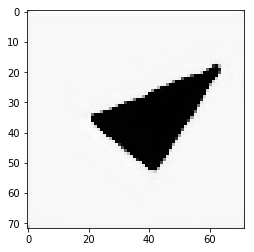

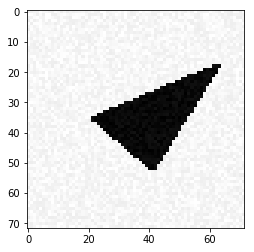

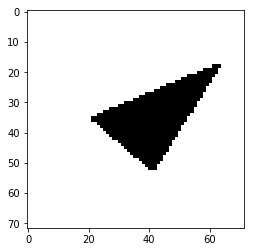

In [104]:
plt.figure(1)
plt.imshow(Y_get0[3,:,:,0], cmap='gray')
plt.figure(2)
plt.imshow(X_test[3,:,:,0], cmap='gray')
plt.figure(3)
plt.imshow(Y_test[3, :, :, 0], cmap='gray')


In [78]:
print(Y_get0)

[[[[0.91439545]
   [0.981091  ]
   [0.98347163]
   ...
   [0.98740005]
   [0.99549353]
   [0.9550798 ]]

  [[0.989638  ]
   [0.9848604 ]
   [0.9866011 ]
   ...
   [0.9906666 ]
   [0.9979749 ]
   [0.9967042 ]]

  [[0.9875169 ]
   [0.99659157]
   [0.994764  ]
   ...
   [0.99287164]
   [0.9872229 ]
   [1.000747  ]]

  ...

  [[0.99145687]
   [0.9942348 ]
   [0.99273324]
   ...
   [0.99368274]
   [0.9943031 ]
   [0.9931755 ]]

  [[0.9819814 ]
   [1.0046152 ]
   [0.9857018 ]
   ...
   [0.992677  ]
   [1.004925  ]
   [1.0024624 ]]

  [[0.91382754]
   [0.9967507 ]
   [0.9877634 ]
   ...
   [0.98906076]
   [0.98337746]
   [0.8597791 ]]]]
